In [45]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()


file_name = list(uploaded.keys())[0]

df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')), error_bad_lines=False, delimiter='\t', quoting=3)


Saving Restaurant_Reviews.tsv to Restaurant_Reviews (5).tsv


<ipython-input-45-c312caa0784a>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')), error_bad_lines=False, delimiter='\t', quoting=3)


In [46]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [47]:
dsaUX = df.sort_values(by= "Liked" , ascending= False)
(dsaUX)

,Review,Liked
0,Wow... Loved this place.,1
464,The inside is really quite nice and very clean.,1
499,Waitress was sweet and funny.,1
502,Cant say enough good things about this place.,1
503,The ambiance was incredible.,1
...,...,...
644,This place has a lot of promise but fails to d...,0
643,Maybe if they weren't cold they would have bee...,0
275,"I've had better, not only from dedicated boba ...",0
641,I'm not eating here!,0


In [48]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words("english"))
dsaUX["Clean_Text"] = dsaUX["Review"].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:
dsaUX["Clean_Text"] = dsaUX["Clean_Text"].apply(lambda x: x.lower())

In [50]:
import string

dsaUX["Clean_Text"] = dsaUX["Clean_Text"].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))

In [51]:
import spacy
#!python -m spacy download en_core_web_sm

nlp = spacy.load("en_core_web_sm")
dsaUX["Clean_Text"] = dsaUX["Clean_Text"].apply(lambda x: ' '.join([token.lemma_ for token in nlp(x)]))

In [52]:
dsaUX

,Review,Liked,Clean_Text
0,Wow... Loved this place.,1,wow love place
464,The inside is really quite nice and very clean.,1,inside really quite nice clean
499,Waitress was sweet and funny.,1,waitress sweet funny
502,Cant say enough good things about this place.,1,can not say enough good thing place
503,The ambiance was incredible.,1,ambiance incredible
...,...,...,...
644,This place has a lot of promise but fails to d...,0,place lot promise fail deliver
643,Maybe if they weren't cold they would have bee...,0,maybe not cold would somewhat edible
275,"I've had better, not only from dedicated boba ...",0,ve well dedicated boba tea spot even jenni...
641,I'm not eating here!,0,m eat


In [53]:
def tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]
dsaUX["Tokens"] = dsaUX["Clean_Text"].apply(tokenize_text)

In [54]:
dsaUX

,Review,Liked,Clean_Text,Tokens
0,Wow... Loved this place.,1,wow love place,"[wow, , love, place]"
464,The inside is really quite nice and very clean.,1,inside really quite nice clean,"[inside, really, quite, nice, clean]"
499,Waitress was sweet and funny.,1,waitress sweet funny,"[waitress, sweet, funny]"
502,Cant say enough good things about this place.,1,can not say enough good thing place,"[can, not, say, enough, good, thing, place]"
503,The ambiance was incredible.,1,ambiance incredible,"[ambiance, incredible]"
...,...,...,...,...
644,This place has a lot of promise but fails to d...,0,place lot promise fail deliver,"[place, lot, promise, fail, deliver]"
643,Maybe if they weren't cold they would have bee...,0,maybe not cold would somewhat edible,"[maybe, not, cold, would, somewhat, edible]"
275,"I've had better, not only from dedicated boba ...",0,ve well dedicated boba tea spot even jenni...,"[ve, well, , dedicated, boba, tea, spot, ,..."
641,I'm not eating here!,0,m eat,"[m, eat]"


In [64]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

dsaUX["Token_Text"] = dsaUX["Tokens"].apply(lambda tokens: ' '.join(tokens))
vectorizer = CountVectorizer(max_features=1500)
x = vectorizer.fit_transform(dsaUX["Clean_Text"]).toarray()
y = dsaUX["Liked"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [65]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [66]:
y_pred = classifier.predict(x_test)

In [73]:
import numpy as np
y_pred = np.array(y_pred)
y_test = np.array(y_test)

result = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1)
#print(result)

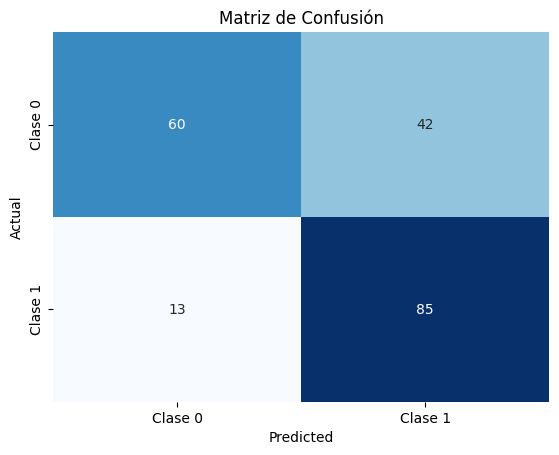

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


In [72]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.725
